<a href="https://colab.research.google.com/github/Jingyong14/HPDP02/blob/main/2425/assignment/asgn2/submission/Group_Synergy/Polars_UK_Housing_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()  # Upload kaggle.json

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"muhammadnurazhar","key":"80725452fb736d0896b070f9687ca7a1"}'}

In [2]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

**Task 1: Dataset Selection (UK Housing Prices Paid
)**

In [3]:
!kaggle datasets download -d hm-land-registry/uk-housing-prices-paid

Dataset URL: https://www.kaggle.com/datasets/hm-land-registry/uk-housing-prices-paid
License(s): other
uk-housing-prices-paid.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
import zipfile
import os

with zipfile.ZipFile("uk-housing-prices-paid.zip", 'r') as zip_ref:
    zip_ref.extractall("uk_housing_data")

## About Dataset

The **Price Paid Data** includes information on all registered property sales in England and Wales that are sold for full market value.  
> **Note:** Address details have been truncated to the **town/city** level.

You might also find the HM Land Registry transaction records to be a useful supplement to this dataset:  
🔗 [UK Land Registry Transactions on Kaggle](https://www.kaggle.com/hm-land-registry/uk-land-registry-transactions)

---

### 📋 Available Fields

- **Transaction unique identifier**  
  A reference number generated automatically for each published sale. This number is unique and changes each time a sale is recorded.

- **Price**  
  Sale price stated on the transfer deed.

- **Date of Transfer**  
  Date the sale was completed, as stated on the transfer deed.

- **Property Type**  
  - `D` = Detached  
  - `S` = Semi-Detached  
  - `T` = Terraced  
  - `F` = Flats/Maisonettes  
  - `O` = Other  

  **Notes:**
  - No separate identification for bungalows.
  - End-of-terrace properties are included in the "Terraced" category.
  - 'Other' applies to property types not covered by the categories above.

- **Old/New**  
  Indicates property age:
  - `Y` = Newly built property  
  - `N` = Established residential building

- **Duration**  
  Tenure type:
  - `F` = Freehold  
  - `L` = Leasehold  
  > Note: Leases of 7 years or less are not recorded in the Price Paid Dataset.

- **Town/City**

- **District**

- **County**

- **PPD Category Type**
  - `A` = Standard entry (single residential property sold for full market value)  
  - `B` = Additional entries including:
    - Power of sale/repossessions  
    - Buy-to-lets (where identifiable via mortgage)  
    - Transfers to non-private individuals  

  **Note:** Category B does not explicitly identify the subtypes listed above.  
  - Category A: available from **January 1995**  
  - Category B: identified from **October 2013**

- **Record Status (monthly file only)**  
  Indicates changes to the record:
  - `A` = Addition  
  - `C` = Change  
  - `D` = Delete

  > When a transaction changes category type (e.g., due to misallocation), it is deleted from the original and added as a new transaction with a new identifier.

---

### 📄 Licensing

This data is released by **HM Land Registry** under the **Open Government License v3.0**.

> Data produced by HM Land Registry © Crown copyright 2017.


**Task 2: Load and Inspect Data using Polars**

In [8]:
!pip install polars

In [1]:
import polars as pl
import time
import os

file_path = "/content/uk_housing_data/price_paid_records.csv"
file_size = os.path.getsize(file_path) / (1024 ** 2)  # in MB
print(f"File size: {file_size:.2f} MB")


File size: 2294.24 MB


**Task 3: Apply Big Data Handling Strategies with Polars**

**Strategy 1: Load Less Data using Polars**

In [2]:
start_time = time.time()

df_less_data_polars = pl.read_csv(
    file_path,
    columns=['Transaction unique identifier',
 'Price',
 'Date of Transfer',
 'Property Type',
 'Old/New',
 'Duration',
 'Town/City',
 'District',
 'County',
 'PPDCategory Type',
 'Record Status - monthly file only']
)

end_time = time.time()

print("Polars - Load Less Data")
print("Time:", round(end_time - start_time, 2), "seconds")
print("Memory:", round(df_less_data_polars.estimated_size('mb'), 4), "MB")

df_less_data_polars.head()

Polars - Load Less Data
Time: 10.85 seconds
Memory: 2109.0099 MB


Transaction unique identifier,Price,Date of Transfer,Property Type,Old/New,Duration,Town/City,District,County,PPDCategory Type,Record Status - monthly file only
str,i64,str,str,str,str,str,str,str,str,str
"""{81B82214-7FBC-4129-9F6B-4956B…",25000,"""1995-08-18 00:00""","""T""","""N""","""F""","""OLDHAM""","""OLDHAM""","""GREATER MANCHESTER""","""A""","""A"""
"""{8046EC72-1466-42D6-A753-4956B…",42500,"""1995-08-09 00:00""","""S""","""N""","""F""","""GRAYS""","""THURROCK""","""THURROCK""","""A""","""A"""
"""{278D581A-5BF3-4FCE-AF62-4956D…",45000,"""1995-06-30 00:00""","""T""","""N""","""F""","""HIGHBRIDGE""","""SEDGEMOOR""","""SOMERSET""","""A""","""A"""
"""{1D861C06-A416-4865-973C-4956D…",43150,"""1995-11-24 00:00""","""T""","""N""","""F""","""BEDFORD""","""NORTH BEDFORDSHIRE""","""BEDFORDSHIRE""","""A""","""A"""
"""{DD8645FD-A815-43A6-A7BA-4956E…",18899,"""1995-06-23 00:00""","""S""","""N""","""F""","""WAKEFIELD""","""LEEDS""","""WEST YORKSHIRE""","""A""","""A"""


**Strategy 2: Simulate Chunking using Polars**

In [3]:
start_time = time.time()

# Simulating chunking by reading limited rows
chunk = pl.read_csv(file_path, n_rows=1000000)

end_time = time.time()

print("Polars - Simulated Chunking (First 1M rows)")
print("Time:", round(end_time - start_time, 2), "seconds")
print("Memory:", round(chunk.estimated_size('mb'), 4), "MB")


Polars - Simulated Chunking (First 1M rows)
Time: 12.47 seconds
Memory: 92.808 MB


**Strategy 3: Data Type Optimization using Polars**

In [4]:
start_time = time.time()

df_opt_polars = pl.read_csv(file_path).with_columns([
    pl.col("Price").cast(pl.Int32),
    pl.col("Property Type").cast(pl.Categorical),
    pl.col("Duration").cast(pl.Categorical),
    pl.col("Record Status - monthly file only").cast(pl.Categorical)
])

end_time = time.time()

print("Polars - Data Type Optimization")
print("Time:", round(end_time - start_time, 2), "seconds")
print("Memory:", round(df_opt_polars.estimated_size('mb'), 4), "MB")


Polars - Data Type Optimization
Time: 15.1 seconds
Memory: 2216.2474 MB


**Strategy 4: Eager Stratified Sampling using Polars**

In [5]:
start_time = time.time()

# Load only necessary columns
df = pl.read_csv(
    file_path,
    columns=["Property Type", "Price", "Old/New", "Duration"]
)

# Optional: cast columns to reduce memory
df = df.with_columns([
    pl.col("Property Type").cast(pl.Categorical),
    pl.col("Old/New").cast(pl.Categorical),
    pl.col("Duration").cast(pl.Categorical),
])

# Define property types
property_types = ["D", "S", "T", "F", "O"]
fraction = 0.1
samples = []

# Stratified sampling per property type
for p_type in property_types:
    sample = df.filter(pl.col("Property Type") == p_type).sample(fraction=fraction, seed=42)
    samples.append(sample)

# Concatenate all samples
stratified_sample = pl.concat(samples)

end_time = time.time()

print("Polars - Eager Stratified Sampling by Property Type")
print("Time:", round(end_time - start_time, 2), "seconds")
print("Sample Size:", stratified_sample.height)
print("Distribution:\n", stratified_sample["Property Type"].value_counts())
print("Memory:", round(stratified_sample.estimated_size('mb'), 4), "MB")

Polars - Eager Stratified Sampling by Property Type
Time: 19.77 seconds
Sample Size: 2248932
Distribution:
 shape: (5, 2)
┌───────────────┬────────┐
│ Property Type ┆ count  │
│ ---           ┆ ---    │
│ cat           ┆ u32    │
╞═══════════════╪════════╡
│ T             ┆ 691881 │
│ S             ┆ 621621 │
│ F             ┆ 408342 │
│ O             ┆ 10056  │
│ D             ┆ 517032 │
└───────────────┴────────┘
Memory: 42.895 MB


**Strategy 5: Parallel Processing with Lazy API**

In [6]:
start_time = time.time()

lazy_df = pl.read_csv(
    file_path,
    columns=["Property Type", "Price", "Old/New"],
    has_header=True
).lazy()

# Lazy transformation pipeline
result = (
    lazy_df
    .with_columns([
        pl.col("Property Type").cast(pl.Categorical),
        pl.col("Old/New").cast(pl.Categorical)
    ])
    .group_by("Property Type")
    .agg([
        pl.len().alias("Count"),
        pl.col("Price").mean().alias("Average Price")
    ])
)

# Trigger execution
final_df = result.collect()

end_time = time.time()

print("LazyFrame - Parallel Processing")
print("Time:", round(end_time - start_time, 2), "seconds")
print("Memory:", round(final_df.estimated_size('mb'), 4), "MB")
print(final_df)

LazyFrame - Parallel Processing
Time: 18.12 seconds
Memory: 0.0001 MB
shape: (5, 3)
┌───────────────┬─────────┬───────────────┐
│ Property Type ┆ Count   ┆ Average Price │
│ ---           ┆ ---     ┆ ---           │
│ cat           ┆ u32     ┆ f64           │
╞═══════════════╪═════════╪═══════════════╡
│ O             ┆ 100568  ┆ 1.2958e6      │
│ F             ┆ 4083424 ┆ 174982.896577 │
│ D             ┆ 5170327 ┆ 250097.467175 │
│ S             ┆ 6216218 ┆ 148967.523731 │
│ T             ┆ 6918811 ┆ 136534.021599 │
└───────────────┴─────────┴───────────────┘


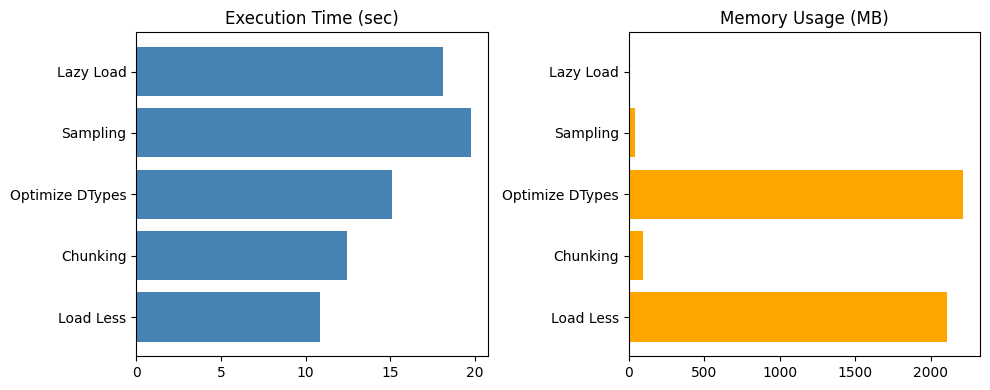

In [7]:
import matplotlib.pyplot as plt

strategies = ["Load Less", "Chunking", "Optimize DTypes", "Sampling", "Lazy Load"]
times = [10.85, 12.47, 15.1, 19.77, 18.12]
memory = [2109.0099, 92.808, 2216.2474, 42.895, 0.0001]

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.barh(strategies, times, color="steelblue")
plt.title("Execution Time (sec)")

plt.subplot(1, 2, 2)
plt.barh(strategies, memory, color="orange")
plt.title("Memory Usage (MB)")
plt.tight_layout()
plt.show()
